<h2 align="left">
    DAT121 Introduction Course for Data Scientists </h2> 
<h3 align="left">
   Group number 2 (four members in total)
</h3> 

</h4> 

<h1><center>Prediction of Portuguese Students’ Final Grade in Mathematics</center></h1>

# Summary
Predicted grades have a significant role in students’ future for example when applying for university or creating a personalised degree pathways in general that enables them to successfully acquire the required knowledge (Polyzou & Karypis, 2016). It is thus of great importance to find models that best predict these grades. In this paper, our group worked with a dataset containing academic results and social and demographic attributes from two public schools in Portugal. The goal of this analysis was to find the best model in predicting Portuguese student’s Final grade in Mathematics by using two data sets, PCA and non PCA, and four regression models, OLS, LASSO, RIdge and Random Forest. To perform this analysis we worked together on exploring an understanding the data as well as understanding our models. During the process, trials and errors were conducted to find the best path to move forward with our analysis. While it can be argued that this is an advanced topic with many previous reports, we still found it possible to conduct such analysis with the knowledge and time at hand. With that, we concluded the report by discussing our results that showed how the optimal model which best predicts Portoguese students’ final grades in mathematics is the Random Forest on the Non PCA dataset. 

# Introduction
## Background and Goals

In this paper, we will be considering a dataset that records Portuguese students’ performance during their final exam in mathematics (Cortez & Silva, 2008, p. 5-12). The dataset also records multiple academic parameters (such as semester grades) and social factors (like parents’ educational level and vocation).

Multiple studies in educational sciences have shown that mathematics is among those subjects most students in secondary education find the most difficult (Dowker, 2005, p324-332; Shin et al., 2013, p. 92-100 ). There are various reasons why students globally tend to find this subject difficult. Shin et al. argue that students in secondary education find mathematics difficult because they are exposed to abstract and complex ideas (Shin et al., 2013, p. 92-100).  Students may therefore find the concepts introduced during their secondary education more difficult than the ones from earlier education. 

It has also been shown that good performance in this subject is often a good predictor of a student's future success in higher education (Freund et al., 2021). Hence, finding factors (either academic or social ones) that can help predict a student’s performance in mathematics is of great interest. This is because it may provide educators with tools to identify and help students with poor performance before the final examination. 

The goal of this paper is to investigate whether different machine learning methods can predict a student’s final examination grade in mathematics. Educational researchers Cortez and Silva have previously used this dataset with a similar goal of predicting students’ final grades (Cortez & Silva, 2008, p. 5-12). The methods used by the authors were mostly classification methods, since they considered the dependent variable (final grade) to be categorical.

The novel aspect of this paper is that ***we will be using a variety of regression methods to find a model which best predicts students’ final grades in mathematics***. In other words, we will consider the dependent variable to be continuous in this paper. 

For a more in-depth analysis, we have chosen to use the regression methods on two data sets, one that has been dimensionally reduced using Principal Component Analysis (PCA) and the other without PCA, and with this comparison, we can see whether PCA gives the best results.


## Data Source

The dataset was published on the UCI Machine Learning Repository website, which is maintained by the University of California, School of Information and Computer Science (Dua & Casey, 2019). 

The data was collected by Paulo Cortez and Alice Silva from the University of Minho, Department of Information Systems/Algoritmi R&D Centre (Cortez & Silva, 2008, p. 5-12). As described in their paper, they collected data from two public schools in Portugal during a 1-year period. The data consists of two parts:

1. Academic results collected from the students’ school reports
2. Social and demographic attributes were collected from questionnaires. 

# Theory and Background 

## Dimensional Data and Multicollinearity:

It is typical to find correlated predictor variables by chance when the dataset contains multiple columns. Correlation may occur in two forms

1. Predictors are highly correlated in pairs 
2. Linear combinations of certain predictors are highly correlated to one or more predictor variables

Both forms are known as multicollinearity, and if present, will result in issues if least squares methods are used to estimate regression parameters (Sincich & Mendenhall, 2013, p. 349). This is because Ordinary Least Square (OLS) (and other least squares methods) assume that the columns in the predictor matrix are independent. If they are not, then such methods will result in parameter estimates with highly inflated variances and estimates that are off (Sincich & Mendenhall, 2013,p. 351-355). We will use some regression methods to help remedy this issue of correlated predictors. 

## Dimension Reduction using PCA
Principal Component Analysis (PCA) is an unsupervised learning method that can be used to reduce the dimensions in a dataset (Witten et al., 2013, p. 251-259). The method’s overall goal is to find orthogonal directions (called principal components (PCs)) in the feature space which explain most of the variance in the predictor columns (Craig et al., 2020, p. 220-221). 

Each PC explains a proportion of the variance in the predictor columns. The PCs are ordered so that the first PC explains the most variance, the second PC explains the second most variance, and the last PC explains the least variance.

To reduce dimensions (and separate noise from the signal), we chose a certain number of PCs (k) that is less than the number of predictor columns (n). In this paper, we chose k so that we have enough PCs to explain at least 80% of the variance in the predictor columns. One can also use cross-validation techniques in combination with feature selection to determine the appropriate number of PCs needed to separate noise from the signal (Witten et al., 2013, p. 259). 

Further, PCs will change depending on the scale of each of the predictors that are used where more weight is given to variables with larger variance, affecting the final PCR model (Weisberg, 2014, p. 116-119). To give all predictors equal weight and solve the scaling problem, standardisation is often recommended. Standardisation is a technique to reduce challenges related to poor quality by centering the mean around zero and setting the variance in the same order (Jan Kirenz, 2021), hence replacing each of the original predictors with a standardised version. However, if the variables are all measured in the same units (like the numerical variables in our data set), then one might choose not to standardise them (Witten et al., 2013, p. 256-259) as standardisation does not necessarily lead to better results. Moreover, after encoding our categorical variables, our data set contains 16 numerical and 30 binary variables, meaning that numerical variables constitute approximately 35% of our data set. For the reasons mentioned, among others, standardising the data set did not give us better results, and we have therefore chosen to drop the standardisation technique. 

## Ordinary Least Squares Regression
Ordinary Least Squares (OLS)  regression is a method that estimates regression coefficients so that the Residual Sum of Squares (RSS) is reduced (Sincich & Mendenhall, 2013, p. 96-165). The sum to be reduced is as follows (assuming we have n observations and p number of predictors): 

$$ RSS = \sum_{i = 1}^{n}  \left( y_i - \beta_0 - \sum_{j = 1}^{p} \beta_jx_{ij} \right)^2  $$ 
<div style="text-align: right">(Witten et al., 2013,p. 237) </div>

The overall goal of the method is to create a linear relationship between a set of predictor variables and a continuous dependent variable. This will allow us to describe the relationship between predictors and the dependent variable by considering the regression coefficient size and significance (with hypothesis testing). The models generated using OLS regression can also be used for predictions within the sample space using new data. 

OLS regression can be used in conjunction with PCA. To do this, one has to use columns in the score matrix that can be used as predictor columns. Such regression cannot be used to determine the exact relationship between original feature variables and the dependent variable, however, it can be very useful in creating predictive regression models. Normally one chooses a number of PCs that is less than the total number of columns in the predictor matrix.   

## Regularisation using Lasso and Ridge Regression
Lasso (L1-reg) and Ridge (L2-reg) regression are variants of the least squares method. The two methods are useful when we have many predictors, and there may be issues of multicollinearity (Sincich & Mendenhall, 2013, p. 468; Witten et al., 2013, p. 237)  OLS-estimators of regression coefficients often have highly inflated variances and have round-off errors when multicollinearity is present. Lasso and Ridge compensate for this issue by introducing a shrinkage penalty in the expression of RSS (Witten et al., 2013, p. 237). Coefficients are  estimated by minimizing the following:

$$ RSS_{LASSO} = \sum_{i = 1}^{n}  \left( y_i - \beta_0 - \sum_{j = 1}^{p} \beta_jx_{ij} \right)^2  + \alpha  \sum_{j = 1}^{p} |\beta_j|, \quad \alpha \geq 0$$

$$ RSS_{Ridge} = \sum_{i = 1}^{n}  \left( y_i - \beta_0 - \sum_{j = 1}^{p} \beta_jx_{ij} \right)^2  + \alpha  \sum_{j = 1}^{p} \beta_j^2, \quad \alpha \geq 0$$ 
<div style="text-align: right">(Witten et al., 2013, p. 237)</div>

An important aspect of regularisation techniques like Ridge and Lasso regression is to choose an appropriate value for $\alpha$ (also called hyperparameter tuning). In this paper, the tuning of $\alpha$ is done by examining a range of $\alpha$-values, estimating regression coefficients using cross-validation, and selecting $\alpha$-value which results in the smallest predictive error (Witten et al., 2013, p. 250-251). We will use this method of cross-validation to choose an appropriate $\alpha$-value. 

Both these methods will introduce some bias in our estimation of the regression coefficients. Often this is a good trade-off due to having more stable coefficient estimations and improved predictive ability of the model (Sincich & Mendenhall, 2013, p. 468). 

The main difference between these two methods is that Lasso can result in coefficient estimates of exactly 0, whereas in Ridge that is not possible (although they can be small) (Witten et al., 2013, p. 241-242). Lasso may therefore remove unimportant variables and give insight into important ones (although this is outside the scope of this paper). 

## Random Forest Regression
A random forest, which is an ensemble of multiple decision trees, can be understood as the sum of piecewise linear functions in contrast to the global linear and polynomial regression models that we discussed previously. In other words, via the decision tree algorithm, we are subdividing the input space into smaller regions that become more manageable (Raschka & Mirjalili, 2019, p. 342).

When using the Random Forest Algorithm to solve regression problems, you are using the mean squared error (MSE) to how your data branches from each node.

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{f}(x_{i}))^{2}$$
<div style="text-align: right">(Witten et al., 2013, p. 29)</div>

Where:
1. $n$ is the number of data point
2. $\hat{f}(x_{i})$ is the value returned by the model
3. $y_i$ is the ith observed value 


This formula calculates the distance of each node from the predicted actual value, helping to decide which branch is the better decision for your forest. Here, $y_i$ is the value of the data point you are testing at a certain node and $\hat{f}(x_{i})$ is the value returned by the decision tree (Raschka & Mirjalili, 2019, p. 340).

# Methods
Following is a summary of the methods used in the Exploration and Results part of this paper.

## Preliminary Exploration of Data
In this section, we will do some preliminary exploration of the dataset before encoding and manipulating the dataframe. Here, we will do the following:

1. Attribute/column inspection of the dataset
2. Heatmap of correlations between columns
3. Plot the highest correlated variables in the dataset against the response variable
4. Plot the distribution of levels for selected categorical variables.

## Dimension Reduction and Modelling
As previously discussed, we will use PCA to find the appropriate number of columns needed to explain at least 80% of the variance in the predictor columns. These k number of columns in the score matrix will be used as predictor columns. This selected number of columns will be referred to as the *PCA dataset*.  

The following regression modelling techniques will be used on both the original dataset (with binary columns for categorical columns) and the PCA dataset:

1. Ordinary Least Squares (OLS) Regression 
2. Lasso Regression
3. Ridge Regression
4. Random Forest Regression

## Model fit and Predictive Power Criterion

Model fit will be evaluated using Coefficient of Determination ($R^2$) and Root Mean Square Error ($RMSE$). We will consider model fit for both the training and testing sets, however, $R^2$ and $RMSE$ (or $RSMEP$: Root Mean Square Error of Prediction) for test will be the most important model fit criterion:

$$R^2 = 1 - \frac{SSE}{SST} $$ 

<div style="text-align: right">(Sincich & Mendenhall, 2013, p. 183)</div>

$$ \text{RMSE} = \sqrt{ \sum_{i=1}^{n} \frac{(y_i - \hat{f}(x_{i})^2}{n}} $$
<div style="text-align: right">(Sincich & Mendenhall, 2013, p. 533)</div>

Where: 
1. $SSE$ refers to the sum of squares of errors 
2. $SST$ refers to the total sum of squares
3. $y_i$ refers to the observed values for the final grade in the test set
4. $\hat{f}(x_{i})$ refers to the predicted values for the final grade in the test set
5. $n$ refers to the total number of samples/rows

# Exploration Analysis and Results


## Import Modules and Data

In the following section we will import the modules needed for the analysis as well as the dataset.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from math import sqrt
#from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

#--------------------------------------------------------------------------------------------------------------

#Reading in csv-file
df_raw = pd.read_csv("student-mat.csv", sep = ";") 
#Inspecting  first rows of the dataset 
df_raw.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

## Data Description 
We will have a closer look at the contents of the dataset's variables using the following code block.

### Variable description by the dataset collectors

In [ ]:
# Understand the variables
pd.options.display.max_colwidth = 150
pd.read_csv('variable_explanation.csv', index_col=0)

Variables  \
0       school   
1          sex   
2          age   
3      address   
4      famsize   
5      Pstatus   
6         Medu   
7         Fedu   
8         Mjob   
9         Fjob   
10      reason   
11    guardian   
12  traveltime   
13   studytime   
14    failures   
15   schoolsup   
16      famsup   
17        paid   
18  activities   
19     nursery   
20      higher   
21    internet   
22    romantic   
23      famrel   
24    freetime   
25       goout   
26        Dalc   
27        Walc   
28      health   
29    absences   
30          G1   
31          G2   
32          G3   

                                                                                                                        Description of variables  
0                                                               student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)  
1                                                                                             student's sex (binary: 'F' - female or 'M' - male)  
2                                                                                                         student's age (numeric: from 15 to 22)  
3                                                                               student's home address type (binary: 'U' - urban or 'R' - rural)  
4                                                                     family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)  
5                                                                    parent's cohabitation status (binary: 'T' - living together or 'A' - apart)  
6   mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2-5th to 9th grade, 3 - secondary education or 4-higher education)  
7   father's education (numeric: 0 - none, 1 - primary education (4th grade), 2-5th to 9th grade, 3 - secondary education or 4-higher education)  
8                                               mother's job (nominal: 'teacher', 'health' care related, civil 'services', 'at_home' or 'other')  
9                                               father's job (nominal: 'teacher', 'health' care related, civil 'services', 'at_home' or 'other')  
10                                  reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')  
11                                                                                   student's guardian (nominal: 'mother', 'father' or 'other')  
12                                  home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
13                                              weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
14                                                                                  number of past class failures (numeric: n if 1<=n<3, else 4)  
15                                                                                                 extra educational support (binary: yes or no)  
16                                                                                                family educational support (binary: yes or no)  
17                                                         extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
18                                                                                               extra-curricular activities (binary: yes or no)  
19                                                                                                   attended nursery school (binary: yes or no)  
20                                                                                            wants to take higher education (binary: yes or no)  
21                                                                                                   Internet access at home (binary: yes or no)  
22         

From the above description, we can see that we have a total of 33 attributes/columns mainly belonging to 3 types: 
1. Binary Attributes: Only 2 values are possible. It can be both qualitative & quantitative. In this type, we have a total of 13 attributes: 'school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', and 'romantic'.
2. Nomial/Categorical Attributes: More than 2 finite numbers of values are possible, usually without any ranking. In this type, we have a total of 4 attributes: 'Mjob', 'Fjob', 'reason', and 'guardian'.
3. Numerical/Ordinal Attributes: Any kind of order/rank.  In this type, we have a total of 16 attributes signifying natural order : 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', and 'G3'.

### Attribute/column Inspection of the Dataset
It would be useful to extract what data types (interger or object) is contained in the differnt columns. Simultatenously, we will check the dataframe for any missing values.

In [ ]:
# Checking data type
print('Variable    Data type \n', df_raw.dtypes)

# printing sum of data types
print('\n No of ranked/integer columns:', (df_raw.dtypes == 'int64').sum())
print('No of catagorical columns:', (df_raw.dtypes == 'object').sum())

Variable    Data type 
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

 No of ranked/integer columns: 16
No of catagorical columns: 17


In [ ]:
# Checking for missing values
print('Variable  Presence of NA\n', df_raw.isnull().sum())

Variable  Presence of NA
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


From the code block above, we can identify that we do not have any missing values in our dataset. Further we see  that 16 columns carry columns with integer-values, while 17 columns contain string-variables (denoted as object in the output above). For this reason, the columns of our dataset will be divided into 2 groups:

1. cols_numb: contains the names of columns with integers/natrual ordered numbers
2. cols_cat: contains the names of columns that are categorical variables

Following is code which collects the columns in the two different groups stated

In [ ]:
#Finding all columns with natural order
idx_numb = np.where(df_raw.dtypes.values == 'int64')  #index position of all columns with int64-values
cols_numb = df_raw.dtypes.index[idx_numb]  #return column-names as Index-obj
cols_numb = cols_numb.values   #Turn Index-obj to array

#Finding all catagorical columns w/ no natural order
idx_cat = np.where(df_raw.dtypes.values == 'object')
cols_cat = df_raw.dtypes.index[idx_cat]
cols_cat = cols_cat.values

In [ ]:
#Identifying the number of levels in categorical columns:
print('Varibale    No. of levels \n', df_raw[cols_cat].nunique())

Varibale    No. of levels 
 school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64


From the code block above, we can identify the following groups:
- Attributes with only 2 levels: 'school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', and 'romantic'.
- Attributes with more than 2 levels:  'Mjob', 'Fjob', 'reason', and 'guardian'.

## Exploration Analysis
In this section we will do some prelimenary exploration before encoding and manipulation of the dataframe. 

### Descriptive Summary Statistics 
We will start with some descriptive statistics for the columns with natural order (the ones that contain integer values). The describe() is used for summarizing the data from the Panda’s DataFrame which includes count, mean, std, min, max and percentiles(25%, 50%, 75%) (Machine Learning Plus, 2021). The following code illustrates the descriptive statistics for the columns with natural order (the ones that contain integer values). 

In [ ]:
#Descriptive statistics of columns with natural numbers
df_raw[cols_numb].describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

From the above table, in the case of absences, considering the range between the maximum and the minimum values the mean is comparatively low. So, it has a high possibility of outliers.

As we look into percentiles, most of the values seem standard. ‘Absence’, however, shows that the 50th percentile value is lower than the mean, proving that the value has been skewed by outliers. The fact is also evident by that 75th percentile value for ‘absence’, which is very lower compared to the max value.

The standard deviations for absences, and grades (G1, G2, G3) are comparatively larger. It means their values are much more varied. Absence has the highest amount of variance. Typically normalization would be applied before using Principal Component Analysis. However, ‘absence’ having higher STD means normalization will skew other STD values based on ‘absence’. However, we can discard ‘absence’ into consideration because it has outliers. The rest of the standard deviation values do not vary so much to have normalization as an added step. The evidence of this also was seen in the results.

### Heatmap of correlations between columns
We may now move onto plotting the correlation between variables with natural order/numbers to identify correlated predictors and predictors that are highly correlated with the final grade (G3).

Heatmap is a 2D colour-based representation of the relationship among the variables of the dataset. For identifying patterns and correlations among the variables it is usually used (Naukri Learning, 2022). In the following code block, a heatmap of 16 attributes of our dataset has been illustrated.


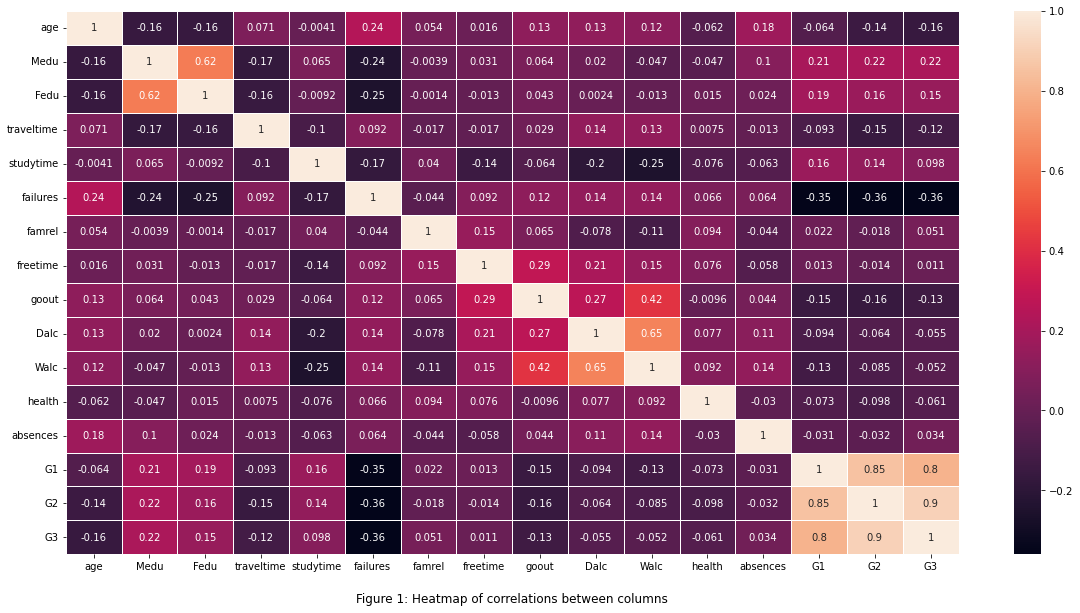

In [ ]:
#Heatmap of correlation (linear correlation)
plt.figure(figsize=(20,10))
sns.heatmap(df_raw.corr(), annot=True, linewidths=0.5)
plt.title('Figure 1: Heatmap of correlations between columns', y=-0.10)
plt.show()

From the *Figure 1: Heatmap of correlations between columns*, we can identify that except for the grades of G1 and G2, none of the other attributes has a strong correlation with the response variable G3. The rest of the observations have been listed below:
- Correlation between 3 grades (G1, G2, G3): G2 and G3 (0.904868) has a higher correlation than G1 and G3 (0.801468).
- Walc (weekend alcohol consumption) and Dalc (workday alcohol consumption) are relatively highly correlated, corr= 0.647544
- Fedu (father’s education) and Medu (mother’s education) are relatively highly correlated, corr= 0.623455
- Walc (weekend alcohol consumption) and goout (going out with friends) are relatively highly correlated, corr= 0.0.420386

As discussed earlier, highly correlated predictors will cause issues when fitting an OLS regression model (Sincich & Mendenhall, 2013,p. 351-355).

###  Scatter plot highly correlated columns 

We now make scatterplots for G1/G2 and G3 since these two predictors are highly correlated with G3. Furthermore, we should take care to identify possible outlier in these plots. 

Scatterplot is one kind of data visualization technique where dots are used for representation and comprehension of the correlation between the chosen variables (Kalamkar, 2022). The code block below generates two scatter plots for the three most correlated columns (G1, G2, G3).

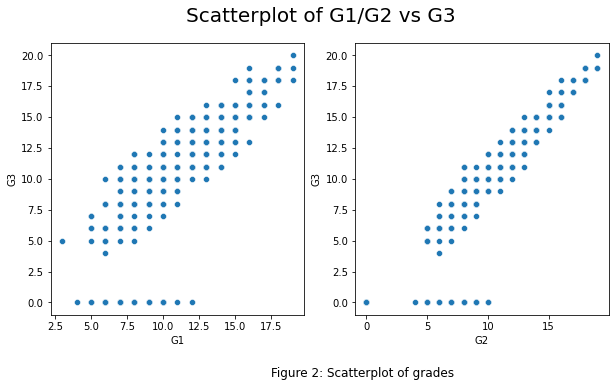

In [ ]:
#Scatterplot between Grade Variables
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.scatterplot(x = df_raw['G1'], y = df_raw['G3'], ax = ax[0])
sns.scatterplot(x = df_raw['G2'], y = df_raw['G3'], ax = ax[1])
plt.suptitle('Scatterplot of G1/G2 vs G3', size = 20)
plt.title('Figure 2: Scatterplot of grades', x= 0.03, y=-0.25)
plt.show()

From the above scatter plot figures, we can see that both the G1-G3 and the G2-G3 have a very high positive correlation with very few outliers. Further, we can identify outlier when the value of G3 is 0. If we remove these outliers there is a possibility of losing important information incorporating students failing in the final exam (G3) and explanations of their lower grades, hence we have decided against it. In addition to this, such a low number of outliers will not have any drastic impact on the results of our models.


### Unbalanced data exploration with Histogram
The dataset does not seem to be balanced with regards to certain categorical variables. We have selected the variables with the most uneven distribution in levels to illustrate this through a histogram.  

The histogram is a Bar Chart looking visualization tool that unlike bar charts helps to illustrate the distribution of a single continuous numeric variable of a dataset  (Weitz, 2020).
The dataset does not seem to be balanced concerning certain categorical variables. To illustrate the uneven distribution of levels within certain categorical variables, we will plot histograms in the following block.


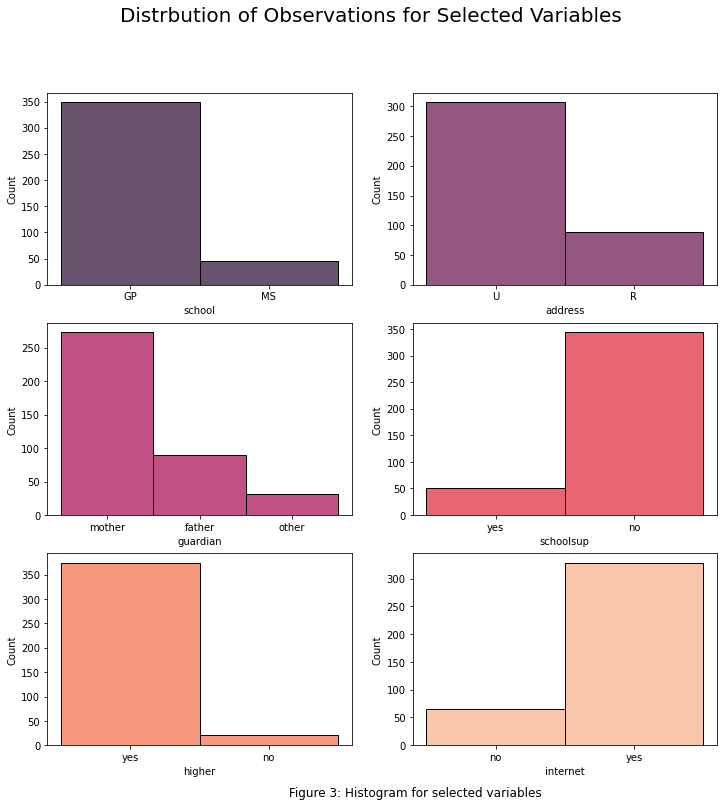

In [ ]:
selected_cols = ['school', 'address', 'guardian', 
                 'schoolsup', 'higher', 'internet']
colours = sns.color_palette("rocket").as_hex()

fig, ax = plt.subplots(3,2, figsize = (12,12))

"""
SOURCE: https://stackoverflow.com/questions/49690316/pandas-boxplots-as-subplots-with-individual-y-axis [18.08]
SOURCE: https://www.tutorialspoint.com/what-does-axes-flat-in-matplotlib-do 
"""

for i, axes in enumerate(ax.flat):  
    sns.histplot(df_raw, x = selected_cols[i], ax= axes, color = colours[i])

plt.suptitle('Distrbution of Observations for Selected Variables',
             size = 20)
plt.title('Figure 3: Histogram for selected variables', x= 0.01, y=-0.3)
plt.show()

From the above diagram, we can comprehend that certain levels within categorical variables appear to be overrepresented. We should keep this in mind, since our model may not reflect underrepresented levels as well.

### Encoding of Catagorical Columns:
The 17 categorical variables that we have in the dataset will be encoded as binary columns in the following way: 
- Attributes with only 2 levels (Binary attributes): These will be encoded by one unique binary-column (the first level will be dropped), meaning they will be coded directly in binary without the introduction of additional columns. 
- Attributes with more than 2 levels: These will be encoded by multiple binary columns preserving the information of all the levels. Here we will not drop the first level, since this may cause confusion regarding the value.

In [ ]:
"""
We have to keep track of types of catagorical variables:
    1. Catagorical variable with 2 levels: Coded as binary and first level is dropped
    2. Categorical variable with more than 2 levels: Coded as binart and all levels are kept
"""
# Create a copy of the dataset
df_cleaned = df_raw.copy()

# Binary coding of columns with only two levels (dropping the first level)
cols_catbin = cols_cat[df_raw[cols_cat].nunique().values == 2].tolist()
print("Attributes with only 2 levels (Binary attributes): ( total "+str(len(cols_catbin))+" ):\n", cols_catbin)
df_cleaned = pd.get_dummies(df_cleaned, columns = cols_catbin, drop_first= True)

# Binary coding of columns with more than two levels (keeping all levels)
cols_catmultiple = cols_cat[df_raw[cols_cat].nunique().values > 2].tolist()
print("\nAttributes with more than 2 levels: ( total "+str(len(cols_catmultiple))+" ):\n", cols_catmultiple)
df_cleaned = pd.get_dummies(df_cleaned, columns = cols_catmultiple)

#Printing and saving pandas df as csv:
df_cleaned.head()

# df_cleaned.to_csv("studydata_cleaned.csv") commented out since we have created csv.file once

Attributes with only 2 levels (Binary attributes): ( total 13 ):
 ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Attributes with more than 2 levels: ( total 4 ):
 ['Mjob', 'Fjob', 'reason', 'guardian']


age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  Fjob_other  Fjob_services  Fjob_teacher  reason_course  \
0     1  ...           0              0             1              1   
1     1  ...           1              0             0              1   
2     2  ...           1              0             0              0   
3     1  ...           0              1             0              0   
4     1  ...           1              0             0              0   

   reason_home  reason_other  reason_reputation  guardian_father  \
0            0             0                  0                0   
1            0             0                  0                1   
2            0             1                  0                0   
3            1             0                  0                0   
4            1             0                  0                1   

   guardian_mother  guardian_other  
0                1               0  
1                0               0  
2                1               0  
3                1               0  
4                0               0  

[5 rows x 46 columns]

## Creating Training and Testing set
For training and testing the regression models, we have split the dataset maintaining the ratio of 7:3. The following code block creates a train set and test set for our dataset.

In [ ]:
""" SOURCE: Python for Machine Learning from p. 145 """
np.random.seed(1213)
X_cleaned = df_cleaned.drop('G3', axis= 1)
y_cleaned = df_cleaned['G3']

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned,
                                                    test_size= 0.3, train_size=0.7)

## Dimension Reduction with PCA :

In the following section, we will perform PCA using all 45 predictor columns in the cleaned data frame. We wish to find the number of the principal components needed to explain at least 80% of the variance in the predictor columns. These PCs will will be used for further analysis.

We start first with fitting a PCA-model to the training set:

In [ ]:
"""SOURCE: Python for Machine Learning from p. 145 """
# Fitting PCA-model
pca = PCA()
Z = pca.fit_transform(X_train)  #Z is the score-matrix

We may now create a scree-plot to visualize the proportion of variance explained by each PC.

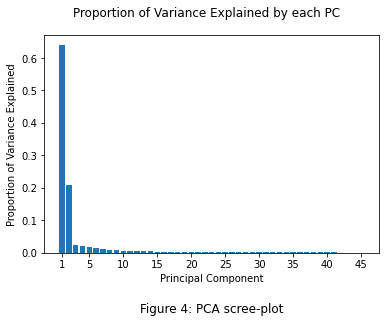

In [ ]:
#Scree-plot and Cummulative variance plot

plt.bar(x =list(range(1,46)) , height = pca.explained_variance_ratio_)
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.suptitle('Proportion of Variance Explained by each PC')
plt.title('Figure 4: PCA scree-plot', y=-0.3)
plt.xticks(ticks = [1,5,10,15,20,25,30,35,40,45])
plt.show()

From the figure above,  we can see that the first PC only explains about 60% of the total variance in the predictor columns which is low. Hence we must take a few more PCs to explain at least 80% of the total variance in the columns.

Following is a plot which displays the cummulative variance explained by the PCs:

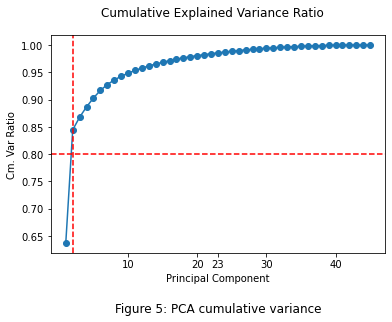

No. of PCs needed: 2


In [ ]:
#For-loop for calculating the cummulative variance explained (ratio)
cm_var = []
var = 0
for i in range(len(pca.explained_variance_ratio_)):
    var += pca.explained_variance_ratio_[i]
    cm_var.append(var)
cm_var = np.array(cm_var)

#Extracting the no. of PCs needed in order to explain 80% of variance
idx = np.where(cm_var >= 0.8)[0][0]+1  
plt.plot(list(range(1,46)), cm_var, '-o')
plt.xticks(ticks = [10,20,23,30,40])
plt.axhline(0.8, ls ='--', c = 'r')
plt.axvline(idx, ls ='--', c = 'r')
plt.xlabel('Principal Component')
plt.ylabel('Cm. Var Ratio')
plt.suptitle('Cumulative Explained Variance Ratio')
plt.title('Figure 5: PCA cumulative variance', y=-0.3)
plt.show()

print(f'No. of PCs needed: {idx}')

From the above plot, we can see that we need at least 2 PCs to explain the 80% of the variance in the predictor columns. 
The next step is to perform regression methods using the 2 PCs as predictors. 

## Regression Modelling over PCA Dataset
Before we start to model, we create our test and train sets using 2 PCs.

In [ ]:
#Rotate coordinates in test set onto the space spannes by PCs:
Z_train = Z[:,:2].copy()
Z_test = pca.transform(X_test)[:,:2]   #Testing data rotated onto PCs

### OLS Regression Model

The linear regression model to be fitted is as follows:

$$ y_i = \beta_0 + \beta_1PC_{1i} + \beta_2PC_{2i} $$ 
$$ i = 1,2, \dots, 276$$

The following code block fit an OLS model using the first two PCs as predictors. It also makes predictions and returns values for $R^2$ and $RMSE$.

First we fit the model before moving onto predictions and then we move onto predictions and calculating  $R^2$ and $RMSE$:

In [ ]:
# Fitting the model
OLSPCA_model = LinearRegression().fit(Z_train, y_train)

In [ ]:
# OLS Model evaluation 

# R squared
print(f'R-squared training set is: {OLSPCA_model.score(Z_train, y_train):.4f}')
print(f'R-squared testing set is: {OLSPCA_model.score(Z_test, y_test):.4f}')

# predictors
y_pred_OLStrain_PCA = OLSPCA_model.predict(Z_train)
y_pred_OLStest_PCA = OLSPCA_model.predict(Z_test)

# RMSE 
OLS_RMSE_train_PCA=rmse(y_train, y_pred_OLStrain_PCA)
OLS_RMSE_test_PCA=rmse(y_test, y_pred_OLStest_PCA)

print('\n')
print(f'The RMSE training set is: {OLS_RMSE_train_PCA:.4f}')
print(f'The RMSE testing set is: {OLS_RMSE_train_PCA:.4f}')

R-squared training set is: 0.8317
R-squared testing set is: 0.7189


The RMSE training set is: 1.8377
The RMSE testing set is: 1.8377


### Lasso Regression Model
Next, we move on to fitting a Lasso model using the two PCs as predictors. The following code chunk fits a model and finds the best value for  before moving on to predictions. 

In [ ]:
"""
SOURCE: https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/
SOURCE: https://vitalflux.com/lasso-ridge-regression-explained-with-python-example/
SOURCE: https://machinelearningmastery.com/lasso-regression-with-python/
"""

# define the Lasso object 
lassoPCA_model = LassoCV(cv=5, max_iter=10000)

# fit the model
lassoPCA_model.fit(Z_train, y_train.ravel())

# extract optimal alpha 
print('The optimal alpha is:', lassoPCA_model.alpha_)

The optimal alpha is: 0.020518954731797424


In [ ]:
# Best Model

# set best alpha & fit model
lassoPCA_best = Lasso(alpha=lassoPCA_model.alpha_)
lassoPCA_best.fit(Z_train, y_train)

Lasso(alpha=0.020518954731797424)

In [ ]:
# Lasso Model evaluation 

# R squared
print('R squared training set is', round(lassoPCA_best.score(Z_train, y_train),4))
print('R squared test set is', round(lassoPCA_best.score(Z_test, y_test),4))

# preditors
y_pred_Ltrain_PCA = lassoPCA_best.predict(Z_train)
y_pred_Ltest_PCA = lassoPCA_best.predict(Z_test)

# RMSE
Lasso_RMSE_train_PCA=rmse(y_train, y_pred_Ltrain_PCA)
Lasso_RMSE_test_PCA=rmse(y_test, y_pred_Ltest_PCA)

print('\n')
print('RMSE training set is', Lasso_RMSE_train_PCA)
print('RMSE test set is', Lasso_RMSE_test_PCA)

R squared training set is 0.8317
R squared test set is 0.7188


RMSE training set is 1.8377420864430205
RMSE test set is 2.4989670892654243


### Ridge Regression Model
Again we use the first two PCs as predictors and fit a Ridge regression model. Before making predictions and fitting the model, we perform tuning of the $\alpha$-value. For that first, we took the range of 1 to 500. The optimal value was 452.4. Then for reducing the run time of the code, we change the range from  400 to 500. The optimal value of alpha remains the same. Then with the optimal value of $\alpha$, we fit the model, make predictions and find the values for both $R^2$ and $RMSE$.

In [ ]:
"""
SOURCE: https://machinelearningmastery.com/ridge-regression-with-python/
SOURCE:https://keremkargin.medium.com/ridge-regression-fundamentals-and-modeling-in-python-bb56f4301f62
"""

# define the cross validation
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

# define model
ridgePCA_model = RidgeCV(alphas=np.arange(400, 500, 0.05), cv=cv, scoring='neg_mean_absolute_error')

# fit model
ridgePCA_model.fit(Z_train, y_train)

# summarize chosen configuration
best_alpha_PCA = ridgePCA_model.alpha_
print('The optimal alpha is:',best_alpha_PCA)

The optimal alpha is: 452.4000000000119


In [ ]:
# Running Ridge regressor with alpha= 452.4 (Optimal value)

# Instantiate a Ridge regressor: ridge
ridgePCA_best = Ridge(alpha=best_alpha_PCA)

# fit model
ridgePCA_best.fit(Z_train, y_train)

Ridge(alpha=452.4000000000119)

In [ ]:
# Ridge Model evaluation 

# R squared
print('R squared Training Set:', round(ridgePCA_best.score(Z_train, y_train),4))
print('R squared Test Set:', round(ridgePCA_best.score(Z_test, y_test),4))

# predictors
y_pred_Rtrain_PCA = ridgePCA_best.predict(Z_train)
y_pred_Rtest_PCA = ridgePCA_best.predict(Z_test)

# RMSE
Ridge_RMSE_train_PCA=rmse(y_train, y_pred_Rtrain_PCA) #y_pred = lasso_best.predict(X_train)
Ridge_RMSE_test_PCA=rmse(y_test, y_pred_Rtest_PCA)

print('\n')
print('RMSE Training set:', Ridge_RMSE_train_PCA)
print('RMSE Test set:', Ridge_RMSE_test_PCA)


R squared Training Set: 0.8286
R squared Test Set: 0.7061


RMSE Training set: 1.8545651675795978
RMSE Test set: 2.554798544376069


### Random Forest Regression Model

Using the first two PCs as predictors we fit a Random Forest Regression model. Then we observe the different $R^2$ and $RMSE$ values for the most important features as well as all the features.

In [ ]:
"""
SOURCE: https://www.geeksforgeeks.org/random-forest-regression-in-python/
"""

# define the Random Forest object 
RFPCA_model = RandomForestRegressor(n_estimators=100)

# fit the model
RFPCA_model.fit(Z_train, y_train.ravel())

RandomForestRegressor()

In [ ]:
# Random Forest Model evaluation 

# R squared
print('R squared Training Set:', round(RFPCA_model.score(Z_train, y_train),4))
print('R squared Test Set:', round(RFPCA_model.score(Z_test, y_test),4))

# predictors
y_pred_RFtrain_PCA = RFPCA_model.predict(Z_train)
y_pred_RFtest_PCA = RFPCA_model.predict(Z_test)

# RMSE
RF_RMSE_train_PCA=rmse(y_train, y_pred_RFtrain_PCA) #y_pred = lasso_best.predict(X_train)
RF_RMSE_test_PCA=rmse(y_test, y_pred_RFtest_PCA)

print('\n')
print('RMSE Training set:', RF_RMSE_train_PCA)
print('RMSE Test set:', RF_RMSE_test_PCA)


R squared Training Set: 0.9791
R squared Test Set: 0.8335


RMSE Training set: 0.6475083234874338
RMSE Test set: 1.9229070254620813


## Regression Modelling over non-PCA Data Set

### Linear Regression 

Unlike earlier, we will now fit a full OLS regression model using all the 45 predictors in the cleaned data set. The model to be fitted is as follows:
$$ y_i = \beta_0 + \beta_1x_1 + \dots + \beta_{45}x_{45} $$ 
$$ i = 1,2,\dots, 45$$

In [ ]:
# Fit model
OLS_model = LinearRegression().fit(X_train, y_train)

In [ ]:
# OLS Model evaluation 

# R Squared
print(f'R-squared value for train-set: {OLS_model.score(X_train, y_train):.4f}')
print(f'R-squared value for test-set: {OLS_model.score(X_test, y_test):.4f}')

#Predicors
y_pred_OLStrain = OLS_model.predict(X_train)
y_pred_OLStest = OLS_model.predict(X_test)

# RMSE
OLS_RMSE_train=rmse(y_train, y_pred_OLStrain)
OLS_RMSE_test=rmse(y_test, y_pred_OLStest)

print("\n")
print(f'The RMSE training set is: {OLS_RMSE_train:.4f}')
print(f'The RMSE testing set is: {OLS_RMSE_test:.4f}')


R-squared value for train-set: 0.8675
R-squared value for test-set: 0.7511


The RMSE training set is: 1.6309
The RMSE testing set is: 2.3511


### LASSO
Again, we will fit a full regression model and compensate for possible correlated predictors by choosing an appropriate shrinkage penalty or the  value. Like earlier, we will find first an appropriate value for the tuning parameter, before moving on to predictions.

In [ ]:
# define the Lasso object 
las_model = LassoCV(cv=5, max_iter=10000)

# fit the model
las_model.fit(X_train, y_train.ravel())

# extract optimal alpha 
print('The optimal alpha is:', las_model.alpha_)

The optimal alpha is: 0.2970567365304896


In [ ]:
# Best Model

# set best alpha & fit model
lasso_best = Lasso(alpha=las_model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.2970567365304896)

In [ ]:
# Lasso Model evaluation 

print('R squared Training Set:', round(lasso_best.score(X_train, y_train),4))
print('R squared Test Set:', round(lasso_best.score(X_test, y_test),4))

# predictors
y_pred_Ltrain = lasso_best.predict(X_train)
y_pred_Ltest = lasso_best.predict(X_test)

# RMSE
Lasso_RMSE_train=rmse(y_train, y_pred_Ltrain) #y_pred = lasso_best.predict(X_train)
Lasso_RMSE_test=rmse(y_test, y_pred_Ltest)

print('\n')
print('RMSE Training set:', Lasso_RMSE_train)
print('RMSE Test set:', Lasso_RMSE_test)

R squared Training Set: 0.8521
R squared Test Set: 0.7524


RMSE Training set: 1.72272535223815
RMSE Test set: 2.3449653321310997


### Ridge regression

Before making predictions and fitting the model, we perform tuning of the $\alpha$-value. For that first, we took the range of 1 to 500. The optimal value was 178.4. Then for reducing the run time of the code, we change the range from 100 to 200. The optimal value of alpha remains the same.

In [ ]:
# define the cross validation
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

# define model
ridge_model = RidgeCV(alphas=np.arange(100, 200, 0.05), cv=cv, scoring='neg_mean_absolute_error')

# fit model
ridge_model.fit(X_train, y_train)

# summarize chosen configuration
best_alpha_without_PCA = ridge_model.alpha_
print('The optimal alpha is:',best_alpha_without_PCA)

The optimal alpha is: 178.39999999999554


In [ ]:
# Running Ridge regressor with alpha= 178.4 (Optimal value)

# Instantiate a Ridge regressor: ridge
ridge_best = Ridge(alpha=best_alpha_without_PCA)

# Fit model
ridge_best.fit(X_train, y_train)


Ridge(alpha=178.39999999999554)

In [ ]:
# Ridge Model evaluation 

# R squared
print('R squared Training Set:', round(ridge_best.score(X_train, y_train),4))
print('R squared Test Set:', round(ridge_best.score(X_test, y_test),4))

# predictors
y_pred_Rtrain = ridge_best.predict(X_train)
y_pred_Rtest = ridge_best.predict(X_test)

# RMSE
Ridge_RMSE_train=rmse(y_train, y_pred_Rtrain) #y_pred = lasso_best.predict(X_train)
Ridge_RMSE_test=rmse(y_test, y_pred_Rtest)

print('\n')
print('RMSE Training set:', Ridge_RMSE_train)
print('RMSE Test set:', Ridge_RMSE_test)


R squared Training Set: 0.8584
R squared Test Set: 0.7572


RMSE Training set: 1.6857822202903447
RMSE Test set: 2.3220787463149186


### Random Forest
We once again use the Random Forest model to evaluate the non-PCA data set by finding the $R^2$ and $RMSE$ values.

In [ ]:
# define the Lasso object 
RF_model = RandomForestRegressor(n_estimators=100)

# fit the model
RF_model.fit(X_train, y_train.ravel())


RandomForestRegressor()

In [ ]:
# Ridge Model evaluation 

# R squared
print('R squared Training Set:', round(RF_model.score(X_train, y_train),4))
print('R squared Test Set:', round(RF_model.score(X_test, y_test),4))

# predictors
y_pred_RFtrain = RF_model.predict(X_train)
y_pred_RFtest = RF_model.predict(X_test)

# RMSE
RF_RMSE_train=rmse(y_train, y_pred_RFtrain) #y_pred = lasso_best.predict(X_train)
RF_RMSE_test=rmse(y_test, y_pred_RFtest)

print('\n')
print('RMSE Training set:', RF_RMSE_train)
print('RMSE Test set:', RF_RMSE_test)


R squared Training Set: 0.9804
R squared Test Set: 0.8581


RMSE Training set: 0.6270335034850638
RMSE Test set: 1.7753487052435877


# Discussion
## Predictive Power of Different Models
Below are code chunk for summarising the different outcomes for both the PCA and non-PCA data sets. The outcomes are further visualised using a table and bar chart for easier interpretation of the best model for prediction students’ final grade. 
### PCA

In [ ]:
# Summarising the outcomes from PCA Dataset

print('RMSE for regression models using PCA are as follow: \n',
      'The\033[1m OLS\033[0m RMSE for test set:', f'\033[1m{OLS_RMSE_test_PCA:.4f}\033[0m \n',
     'The\033[1m LASSO\033[0m RMSE for test set:', f'\033[1m{Lasso_RMSE_test_PCA:.4f}\033[0m \n',
     'The\033[1m Ridge\033[0m RMSE for test set:', f'\033[1m{Ridge_RMSE_test_PCA:.4f}\033[0m \n',
     'The\033[1m Random Forest\033[0m RMSE for test set:', f'\033[1m{RF_RMSE_test_PCA:.4f}\033[0m')

# Extracting the best model for PCA Dataset 

reg_models_PCA= {'OLS': OLS_RMSE_test_PCA, 'LASSO': Lasso_RMSE_test_PCA, 
      'Ridge': Ridge_RMSE_test_PCA, 'Random Forest': RF_RMSE_test_PCA}

min_RMSE_PCA = min(reg_models_PCA, key=reg_models_PCA.get)

print('\n The model with highest predictive power when using PCA is',
      f'\033[1m{min_RMSE_PCA}\033[0m')

RMSE for regression models using PCA are as follow: 
 The OLS RMSE for test set: 2.4986 
 The LASSO RMSE for test set: 2.4990 
 The Ridge RMSE for test set: 2.5548 
 The Random Forest RMSE for test set: 1.9229

 The model with highest predictive power when using PCA is Random Forest


### Non-PCA

In [ ]:
# Summarising the outcomes from Non-PCA Dataset
print('RMSE for regression models not using PCA are as follow: \n',
      'The\033[1m OLS\033[0m RMSE for test set:', f'\033[1m{OLS_RMSE_test:.4f}\033[0m \n',
     'The\033[1m LASSO\033[0m RMSE for test set:', f'\033[1m{Lasso_RMSE_test:.4f}\033[0m \n',
     'The\033[1m Ridge\033[0m RMSE for test set:', f'\033[1m{Ridge_RMSE_test:.4f}\033[0m \n',
     'The\033[1m Random Forest\033[0m RMSE for test set:', f'\033[1m{RF_RMSE_test:.4f}\033[0m')

# Extracting the best model for Non-PCA Dataset 
reg_models= {'OLS': OLS_RMSE_test, 'LASSO': Lasso_RMSE_test, 
      'Ridge': Ridge_RMSE_test, 'Random Forest': RF_RMSE_test}

min_RMSE = min(reg_models, key=reg_models.get)

print('\n The model with highest predictive power when using the dataset without running PCA is',
      f'\033[1m{min_RMSE}\033[0m')

RMSE for regression models not using PCA are as follow: 
 The OLS RMSE for test set: 2.3511 
 The LASSO RMSE for test set: 2.3450 
 The Ridge RMSE for test set: 2.3221 
 The Random Forest RMSE for test set: 1.7753

 The model with highest predictive power when using the dataset without running PCA is Random Forest


### Visualising the results - Table

In [ ]:
# Create data
models_PCA = [['OLS', round(OLSPCA_model.score(Z_test, y_test),4), round(OLS_RMSE_test_PCA,4)],
             ['LASSO', round(lassoPCA_best.score(Z_test, y_test),4), round(Lasso_RMSE_test_PCA,4)],
             ['Ridge', round(ridgePCA_best.score(Z_test, y_test),4), round(Ridge_RMSE_test_PCA,4)],
             ['Random Forest', round(RFPCA_model.score(Z_test, y_test),4), round(RF_RMSE_test_PCA,4)]]

cols_PCA = ["Regression Models", "R squared PCA", "RMSE PCA"]

models = [['OLS', round(OLS_model.score(X_test, y_test),4), round(OLS_RMSE_test,4)],
             ['LASSO', round(lasso_best.score(X_test, y_test),4), round(Lasso_RMSE_test,4)],
             ['Ridge', round(ridge_best.score(X_test, y_test),4), round(Ridge_RMSE_test,4)],
             ['Random Forest', round(RF_model.score(X_test, y_test),4), round(RF_RMSE_test,4)]]

cols = ["Regression Models", "R squared Non-PCA", "RMSE Non-PCA"]

# PCA DataFrame
df_PCA = pd.DataFrame(models_PCA, columns=cols_PCA)
df_PCA = df_PCA.set_index(cols_PCA[0])

#Non-PCA DataFrame
df_NPCA = pd.DataFrame(models, columns=cols)
df_NPCA = df_NPCA.set_index(cols[0])

# Concatinate both DataFrames
df_comb = pd.concat([df_PCA, df_NPCA], axis=1)

df_comb

R squared PCA  RMSE PCA  R squared Non-PCA  RMSE Non-PCA
Regression Models                                                          
OLS                       0.7189    2.4986             0.7511        2.3511
LASSO                     0.7188    2.4990             0.7524        2.3450
Ridge                     0.7061    2.5548             0.7572        2.3221
Random Forest             0.8335    1.9229             0.8581        1.7753

### Visualising the results - Bar charts

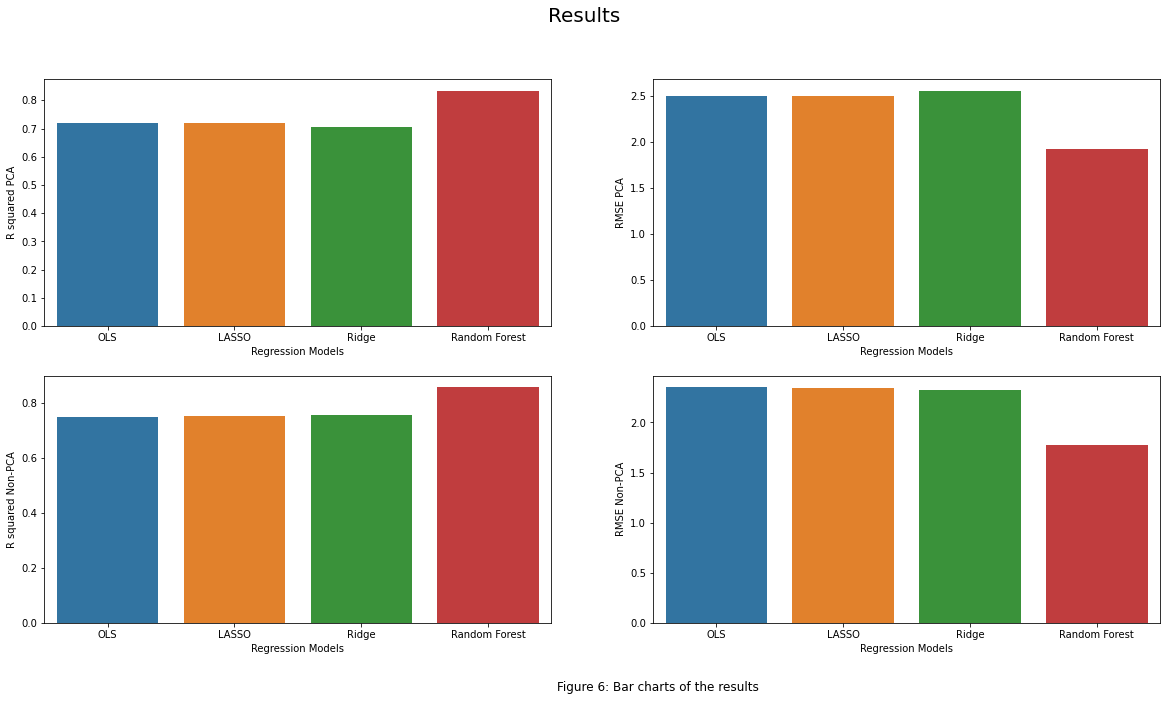

In [ ]:
# Defining columns
model_cols = ['R squared PCA', 'RMSE PCA', 'R squared Non-PCA', 'RMSE Non-PCA']

fig, ax = plt.subplots(2,2, figsize = (20,10))

for i, axes in enumerate(ax.flat):  
    sns.barplot(x=df_comb.index, y=model_cols[i], ax=axes, data=df_comb)
    

plt.suptitle('Results', size = 20)
plt.title('Figure 6: Bar charts of the results', x=0.01, y=-0.3)
plt.show()

From the table above and figure 6, we see how the model with the best performance across datasets in terms of $R^2$ and $RMSE$ is the Random Forest regression model. It performs better when using the non-PCA dataset compared to the PCA dataset. It could be that Random Forest yields the best results because the relationship between predictors and final grade may be too complex to be modelled by a linear regression model. According to Witten et al. decision trees outperform linear regression model when the relationship between the response variable and predictors is non-linear (Witten et al., 2013, p. 338). 

The other models also yield smaller $RMSE$-values when used over the full dataset compared to the PCA-dataset. Although the differences in $RMSE$ values are small, one can speculate that using the full dataset rather than the reduced PCA-dataset may be better for the following reasons: 


As Witten et al. explained it, the underlying assumption when using columns in the score matrix as predictors is that the directions of maximum variance in the predictor columns are related to the response variable (Witten et. al, 2013, p. 257 ). This assumption is often good, however, it may not always be true. Hence, it could be that the full dataset yields better predictions because the directions of maximum variance in the predictor columns are not as highly correlated to variance in the response variable. There is a possibility that the models perform worse using PCA-dataset because we have not accounted for enough signal by only including enough PCs to explain 80% of the variance in the predictor matrix. 

From figure 6, we can comprehend that the performance for OLS, Ridge, and Lasso in terms of both $R^2$ and $RMSE$ is quite similar for both the full dataset and the PCA-dataset. For the PCA-dataset, this finding is not so surprising. Since the predictors or the principal components are by default not correlated. Hence, it may be redundant to use Lasso and Ridge regularisation over such a dataset. Additionally, they also perform similarly when used over the full dataset. This is despite having some linearly correlated predictors (Figure 1: Heatmap of correlations between columns). Multicollinearity between predictors can sometimes leave the model’s prediction ability unaffected (Sincich & Mendenhall, 2013, p. 354). The $RMSE$-value reflects a model’s predictive ability (and not its explanatory ability). If we were to evaluate the regression coefficients, however, it could be the case that OLS estimates would be off when compared to Lasso and Ridge estimates. Hence, a model with correlated variables for predictions can be used, as long as one is careful not to make predictions outside the sample range and draw conclusions from the estimated coefficients (Sincich & Mendenhall, 2013, p. 354-355).   


## Limitations of Models 
Although Random Forest is the model which performs the best, it is a model which is prone to overfitting. This is especially true when the number of relevant predictors is small compared to the total number of predictors (Friedman et al., 2017, p. 596). We saw earlier how the most correlated predictors to final grade were G1 and G2. The other predictors had a low correlation (less than 0.4) with the final grade, hence they may not be very relevant. To test this theory of possible overfit, we would need more test data.

We should also consider that the solutions of  PCA, Ridge and Lasso may change depending on the scale of the variables. It is therefore normally recommended to standardise the predictor matrix prior to finding PCs, and performing Ridge and Lasso regression (Witten et al., 2013, p. 239). We have, however, not chosen to do this. This is because predictions improved when we did not scale the predictor matrix.  

Another limitation of the models developed in this paper is they are mostly appropriate for prediction purposes only. Although we can extract explanatory values (like estimates of regression coefficients) from some of these models, we would not recommend this. This is because we have chosen an approach which only maximises prediction power. 


## Recommendations and Further Studies
Although a model predicting a student's final grade in mathematics is to some degree useful, it would be interesting to further investigate which explanatory variables have the most influence on a student’s final grade. This dataset contains multiple social and academic factors which may be able to explain why some students perform poorly and others do not. 

We, therefore, recommend that future studies include cluster analysis to see if certain groups of students share social and/or academic features which can explain their final grades.


# Conclusion
In our report we analysed five regression models using two data sets, namely a dimesnionally reduced and a full dataset, to see which best predicts students’ final grades in mathematics. The models used were OLS, Lasso, Ridge and Random Forest and our measurement metrics were $R^2$ and $RMSE$ values. Based on our analysis, we concluded the Random Forest to perform best on both the PCA and non-PCA datasets, but scored better on the non-PCA dataset. Hence, for predicting students’ final grades in mathematics, using Random forest without PCA would be the optimal option for the best outcome.


# References
Cortez, P., & Silva, A. (2008, April). Using data mining to predict secondary school student performance. In A. Brito, & J. Teixeira (Eds.), Proceedings of 5th Future Business Technology Conference (FUBUTEC 2008), pp. 5-12. UCI Machine Learning Repository. Retrieved 08 16, 2022, from http://archive.ics.uci.edu/ml/datasets/Student+Performance?ref=datanews.io&fbclid=IwAR0ws0iiW9qgwz2v85RBARjw46eko_iz57cy-bzKOV1PW1VO3hETZkkFL_M

Craig, A. T., Hogg, R., & McKean, J. W. (2020). Introduction to Mathematical Statistics. Pearson.

Dowker, A. (2005). Early identification and intervention for students with mathematics difficulties. Journal of Learning Disabilities, 38(4), 324–332. 10.1177/00222194050380040801

Dua, D., & Casey, G. (2019). UCI Machine Learning Repository. University of California, Irvine, School of Information and Computer Sciences. Retrieved 08 16, 2022, from http://archive.ics.uci.edu/ml

Freund, M.-J., Wolter, I., Lockl, K., & Gnambs, T. (2021). Determinants of profiles of competence development in mathematics and reading in upper secondary education in Germany. PLoS ONE, 16(10), e0258152. https://doi.org/10.1371/journal.pone.0258152

Friedman, J., Tibshirani, R., & Hastie, T. (2017). The Elements of Statistical Learning: Data Mining, Inference, and Prediction, Second Edition (2nd ed.). Springer. https://hastie.su.domains/ElemStatLearn/printings/ESLII_print12.pdf

Jan Kirenz. (2021, December 27). Lasso Regression with Python. Jan Kirenz. Retrieved August 22, 2022, from https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/#standardization

Kalamkar, S. (2022, February 15). matplotlib.pyplot.scatter() in Python. GeeksforGeeks. Retrieved August 28, 2022, from https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/

Machine Learning Plus. (2021, September 16). Pandas Describe. Machine Learning Plus. Retrieved August 28, 2022, from https://www.machinelearningplus.com/pandas/pandas-describe/

Naukri Learning. (2022, February 28). Heatmap in Seaborn. Naukri.com. Retrieved August 28, 2022, from https://www.naukri.com/learning/articles/heatmap-in-seaborn/

Polyzou, A., & Karypis, G. (2016, September 22). Grade prediction with models specific to students and courses. Springer Link. Retrieved August 28, 2022, from https://link.springer.com/article/10.1007/s41060-016-0024-z

Raschka, S., & Mirjalili, V. (2019). Python Machine Learning: Machine Learning and Deep Learning with Python, Scikit-learn, and TensorFlow 2 (2nd ed.). Packt Publishing.

Shin, T., Davison, M. L., Long, J. D., Chan, C.-K., & Heistad, D. (2013, Feburary). Exploring gains in reading and mathematics achievement among regular and exceptional students using growth curve modeling. Learning and Individual Differences, 23, 92-100. https://doi.org/10.1016/j.lindif.2012.10.002.

Sincich, T., & Mendenhall, W. (2013). A Second Course in Statistics: Regression Analysis. Pearson.

Weisberg, S. (2014). Applied Linear Regression (Fourth ed.). John Wiley & Sons, Inc.

Weitz, D. (2020, April 15). Histograms, Why & How, Storytelling, Tips & Extensions | by Darío Weitz. Towards Data Science. Retrieved August 28, 2022, from https://towardsdatascience.com/histograms-why-how-431a5cfbfcd5

Witten, D., James, G., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning: With Applications in R (G. James, Ed.; 2nd ed.). Springer New York. https://www.statlearning.com/